In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise Stats

In [ ]:
a = pd.read_pickle("../data/processed/combined_all.pkl")

Exclude "other" activities as they take up most of the data

In [4]:
filtered_df = a[a['Marker'] != 'other']

In [5]:
filtered_df["Marker"].unique().tolist()

['sit',
 'bend over',
 'bend back',
 'hip slide',
 'slide',
 'rotate',
 'hold',
 'bend over set',
 'bend back set',
 'back extension set',
 'mobilization',
 'back extension EP set',
 'walk',
 'side knee set',
 'side back extension set',
 'side back extension EP set',
 'bordasfal',
 'back extension hold',
 'elbow hold',
 'knee to side set',
 'side elbow hold',
 'bordasfal2',
 'lay flat',
 'knee to side mobilization',
 'knee left right set',
 'knee to side']

IDs instead of names

In [ ]:
participant_mapping = {name: f'{i+1}' for i, name in enumerate(filtered_df['Participant'].unique())}
filtered_df['Participant_id'] = filtered_df['Participant'].map(participant_mapping)
filtered_df['Participant_id'] = filtered_df['Participant_id'].astype(int)

### Unique Exercises per Participant and Most popular exercises 

In [ ]:
exercise_stats = filtered_df.groupby(['Participant_id', 'Marker'])['group_num'].nunique().reset_index()
exercise_stats.columns = ['Participant_id', 'Exercise', 'Occurrences']
unique_exercises_per_participant = filtered_df.groupby('Participant_id')['Marker'].nunique().reset_index()
unique_exercises_per_participant.columns = ['Participant_id', 'Unique Exercises']

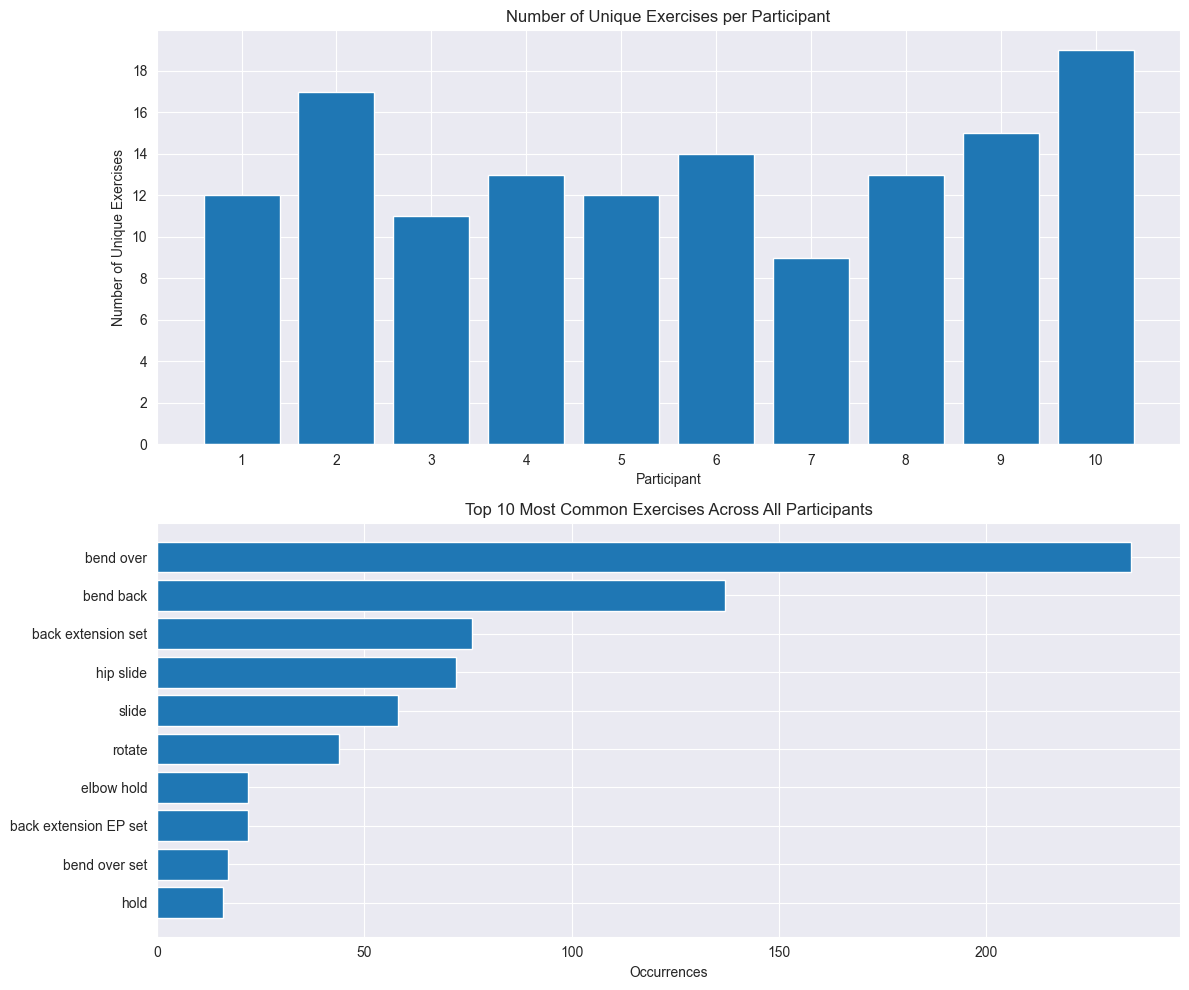

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot 1: Number of unique exercises per participant
axes[0].bar(unique_exercises_per_participant['Participant_id'], unique_exercises_per_participant['Unique Exercises'])
axes[0].set_title('Number of Unique Exercises per Participant')
axes[0].set_xlabel('Participant')
axes[0].set_ylabel('Number of Unique Exercises')
axes[0].yaxis.set_major_locator(MaxNLocator(integer=True))
axes[0].set_xticks(unique_exercises_per_participant['Participant_id'])

# Plot 2: Top 10 most common exercises overall
top_exercises = exercise_stats.groupby('Exercise')['Occurrences'].sum().sort_values(ascending=False).head(10)
axes[1].barh(top_exercises.index, top_exercises.values)
axes[1].set_title('Top 10 Most Common Exercises Across All Participants')
axes[1].set_xlabel('Occurrences')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

### Matrix: how many times each participant performed each exercise

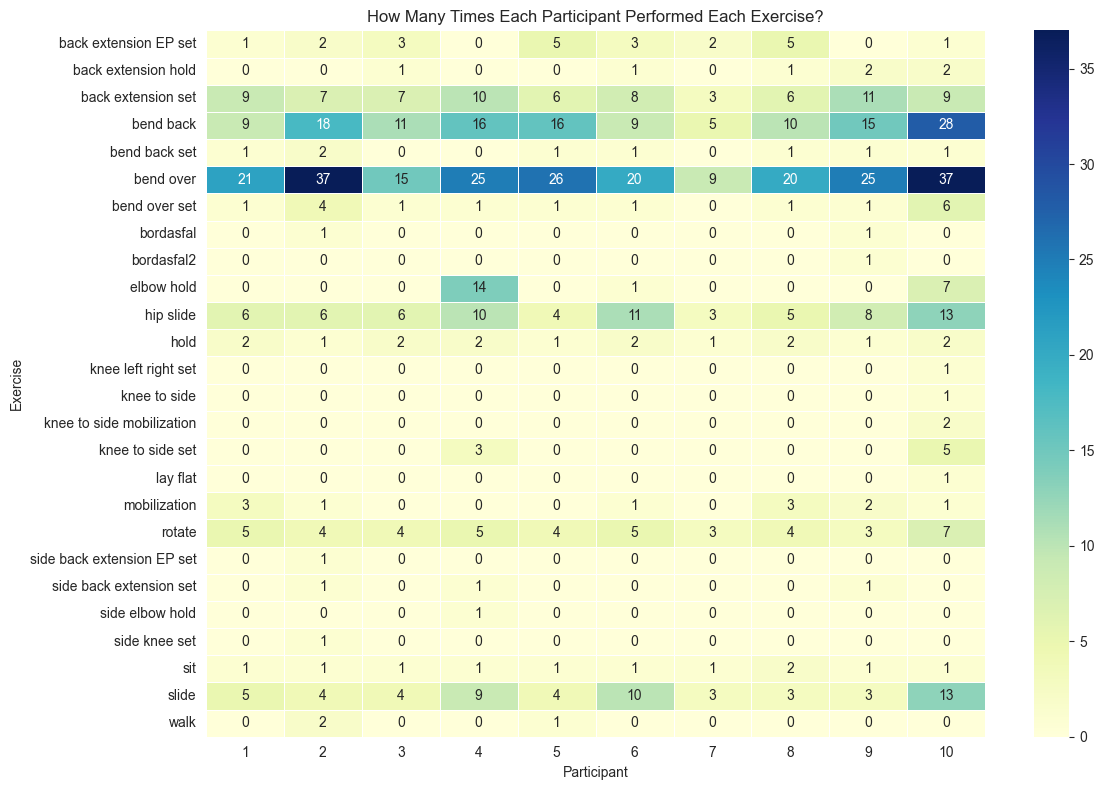

In [15]:
ex_count = filtered_df.groupby(['Participant_id', 'Marker'])['group_num'].nunique().reset_index()
ex_count.columns = ['Participant_id', 'Exercise', 'Count']
adherence_pivot = ex_count.pivot_table(index='Exercise', columns='Participant_id', values='Count', fill_value=0)
adherence_pivot.columns = [str(col) if col != 'Unknown' else 'Unknown' for col in adherence_pivot.columns]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(adherence_pivot, annot=True, cmap="YlGnBu", linewidths=0.5, fmt='g')
plt.title('How Many Times Each Participant Performed Each Exercise?')
plt.xlabel('Participant')
plt.ylabel('Exercise')
plt.tight_layout()
plt.show()

### Exercise variability between sessions

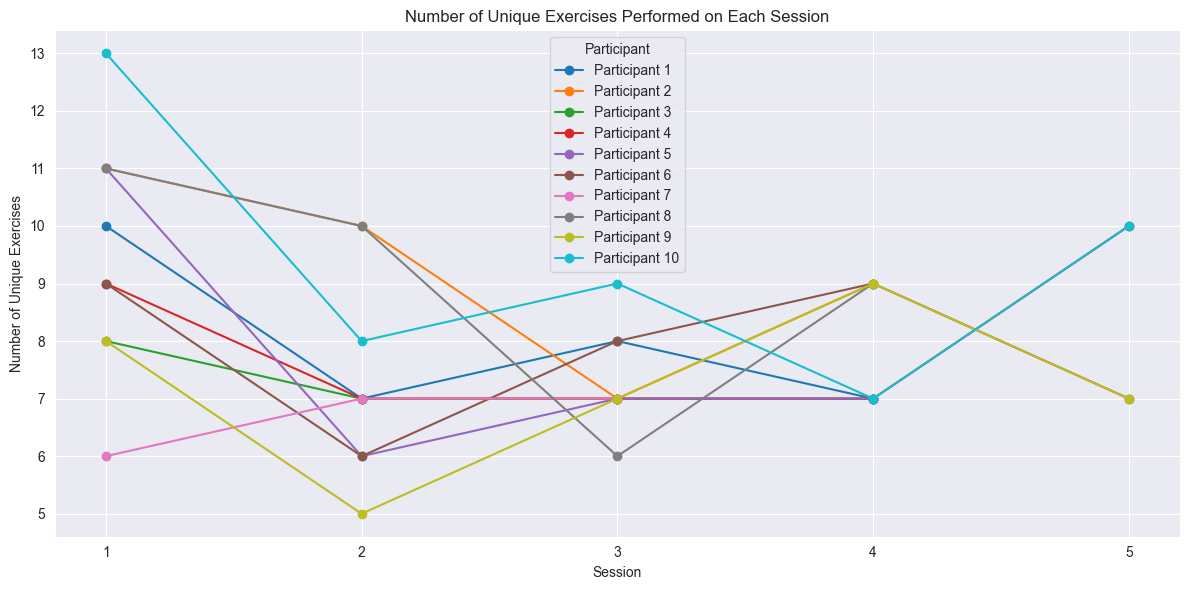

In [23]:
session_variability = filtered_df.groupby(['Participant_id', 'session_id'])['Marker'].nunique().reset_index()
session_variability.columns = ['Participant_id', 'Session', 'Unique Exercises']

fig, ax = plt.subplots(figsize=(12, 6))
for participant in session_variability['Participant_id'].unique():
    participant_data = session_variability[session_variability['Participant_id'] == participant]
    ax.plot(participant_data['Session'], participant_data['Unique Exercises'], marker='o', label=f"Participant {participant}")

ax.set_title('Number of Unique Exercises Performed on Each Session')
ax.set_xlabel('Session')
ax.set_ylabel('Number of Unique Exercises')
plt.legend(title="Participant")  
plt.tight_layout()
plt.show()

## Repetition-level data

In [3]:
df = pd.read_pickle("data/df_for_feature_extraction_with_emg.pkl")

In [5]:
participant_mapping = {name: f'{i+1}' for i, name in enumerate(df['Participant'].unique())}
df['Participant_id'] = df['Participant'].map(participant_mapping)
df['Participant_id'] = df['Participant_id'].astype(int)

In [6]:
reps_summary = df.groupby(['Participant_id', 'Marker'])['Reps'].nunique().reset_index()
reps_summary.columns = ['Participant_id', 'Exercise', 'Rep Count']

# summary of reps by participant and exercise
print("Repetitions by Participant and Exercise:")
print(reps_summary)

# total number of reps by participant
total_reps_by_participant = reps_summary.groupby('Participant_id')['Rep Count'].sum().reset_index()
total_reps_by_participant.columns = ['Participant_id', 'Total Rep Count']

print("\nTotal Repetitions by Participant:")
print(total_reps_by_participant)

# total number of reps for each exercise
total_reps_by_exercise = reps_summary.groupby('Exercise')['Rep Count'].sum().reset_index()
total_reps_by_exercise.columns = ['Exercise', 'Total Rep Count']

print("\nTotal Repetitions by Exercise:")
print(total_reps_by_exercise)

# total number of reps overall
total_reps_overall = reps_summary['Rep Count'].sum()
print("\nTotal Repetitions Overall:", total_reps_overall)


Repetitions by Participant and Exercise:
    Participant_id            Exercise  Rep Count
0                1  back extension set         59
1                1           bend back          8
2                1           bend over         20
3                1           hip slide          6
4                1              rotate          5
5                2  back extension set         51
6                2           bend back         18
7                2           bend over         36
8                2           hip slide          5
9                2              rotate          3
10               3  back extension set         46
11               3           bend back         10
12               3           bend over         15
13               3           hip slide          6
14               3              rotate          4
15               4  back extension set         40
16               4           bend back         10
17               4           bend over         15
18       

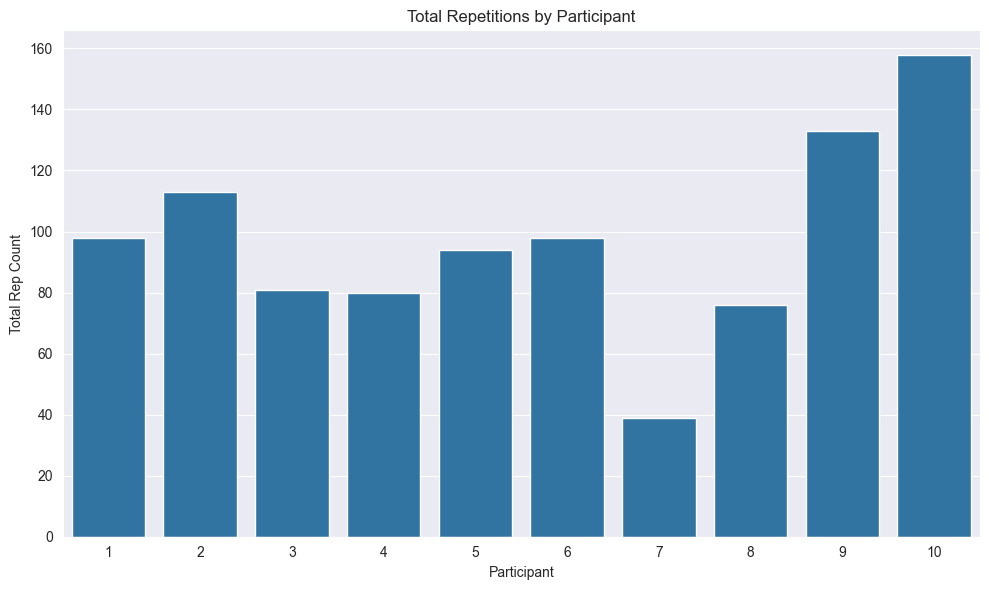

C:\Users\Hp\AppData\Local\Temp\ipykernel_16988\2330663024.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_reps_by_exercise, x='Exercise', y='Total Rep Count', palette="coolwarm")


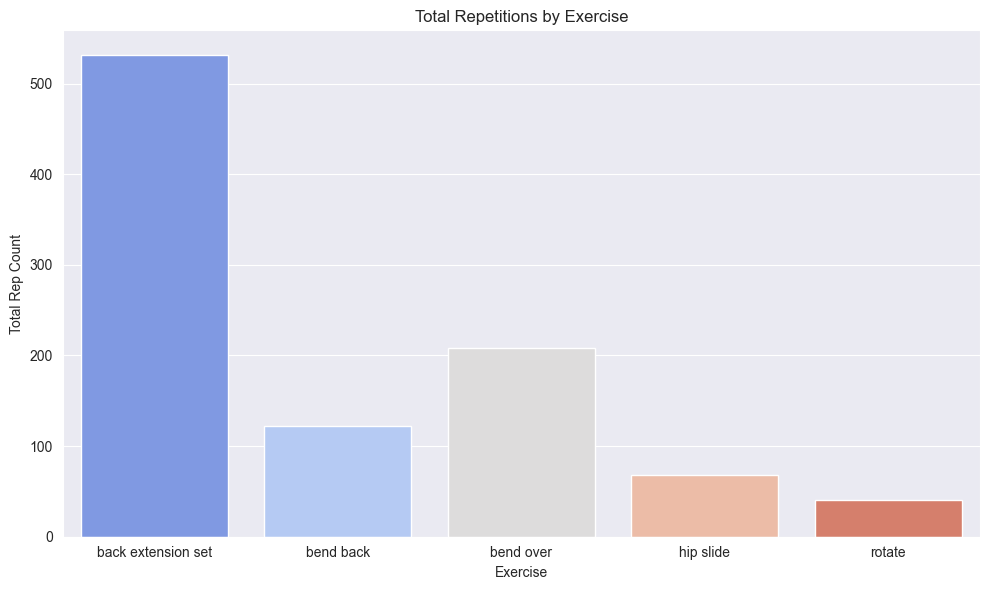


Total Repetitions Overall: 970


In [8]:
# Plot 1: Total Repetitions by Participant
plt.figure(figsize=(10, 6))
sns.barplot(data=total_reps_by_participant, x='Participant_id', y='Total Rep Count')
plt.title('Total Repetitions by Participant')
plt.xlabel('Participant')
plt.ylabel('Total Rep Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot 2: Total Repetitions by Exercise
plt.figure(figsize=(10, 6))
sns.barplot(data=total_reps_by_exercise, x='Exercise', y='Total Rep Count', palette="coolwarm")
plt.title('Total Repetitions by Exercise')
plt.xlabel('Exercise')
plt.ylabel('Total Rep Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Display the total repetitions overall as a text output
print("\nTotal Repetitions Overall:", total_reps_overall)


## Pain levels

In [9]:
features_df = pd.read_pickle("data/df_for_predictions.pkl")

filtered_df = features_df[features_df['Exercise'] == "back extension set"]
filtered_df = filtered_df.drop(columns=["Exercise"])

In [10]:
filtered_df['Roland-Morris_binary'] = (filtered_df['Roland-Morris'] >= filtered_df['Roland-Morris'].median()).astype(int)
filtered_df['Oswestry_Index_binary'] = (filtered_df['Oswestry Index'] >= filtered_df['Oswestry Index'].median()).astype(int)
print(filtered_df.shape)

(532, 773)


In [11]:
df_copy = filtered_df.copy()
df_copy = df_copy[df_copy['Participant'] != 'Margita']
df_copy = df_copy[~((df_copy['Participant'] == 'Petra') & (df_copy['session_id'] == 5))]

# Loop through each participant and reassign session IDs to [1, 2, 3, 4]
for participant in df_copy["Participant"].unique():
    unique_sessions = sorted(df_copy[df_copy["Participant"] == participant]["session_id"].unique())
    session_mapping = {original: new for new, original in enumerate(unique_sessions, start=1)}
    df_copy.loc[df_copy["Participant"] == participant, "session_id"] = df_copy.loc[df_copy["Participant"] == participant, "session_id"].map(session_mapping)

### Back extension 

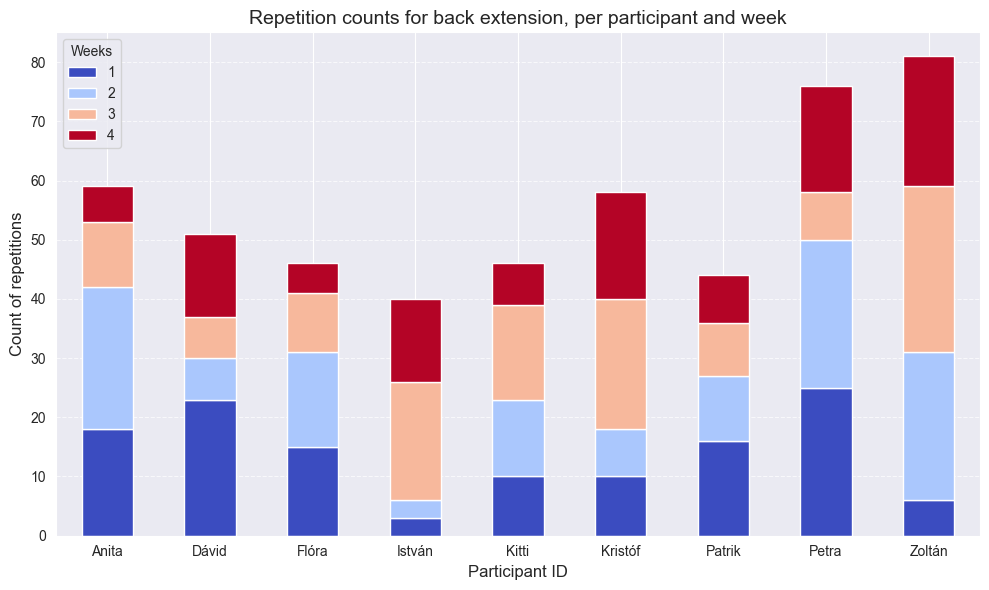

In [12]:
rep_counts = df_copy.groupby(['Participant', 'session_id']).size().unstack(fill_value=0)
rep_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

plt.title('Repetition counts for back extension, per participant and week', fontsize=14)
plt.xlabel('Participant ID', fontsize=12)
plt.ylabel('Count of repetitions', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Weeks', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### rapid improvement

In [13]:
data = {
    'ID': ['Dávid', 'Dávid', 'István', 'István', 'Patrik', 'Patrik', 'Zoltán', 'Zoltán', 'Flóra', 'Flóra', 'Anita', 'Anita', 'Petra', 'Petra', 'Kristóf', 'Kristóf', 'Kitti', 'Kitti'],
    'Questionnaire': ['Roland-Morris', 'Oswestry Index', 'Roland-Morris', 'Oswestry Index', 'Roland-Morris', 'Oswestry Index', 
                      'Roland-Morris', 'Oswestry Index', 'Roland-Morris', 'Oswestry Index', 'Roland-Morris', 'Oswestry Index',
                      'Roland-Morris', 'Oswestry Index', 'Roland-Morris', 'Oswestry Index', 'Roland-Morris', 'Oswestry Index'],
    'First session': [4, 3, 5, 13, 3, 8, 8, 10, 6, 13, 4, 9, 2, 4, 1, 4, 3, 12],
    'Last session': [5, 1, 2, 5, 1, 4, 5, 6, 2, 4, 0, 1, 0, 3, 1, 4, 1, 7]
}

df = pd.DataFrame(data)
participant_mapping = {name: i + 1 for i, name in enumerate(df['ID'].unique())}
df['Numeric ID'] = df['ID'].map(participant_mapping)

# Calculate pain decrease percentages and averages
df['Pain Decrease (%)'] = (df['First session'] - df['Last session']) / df['First session'] * 100
rm_avg = df[df['Questionnaire'] == 'Roland-Morris']['Pain Decrease (%)'].mean()
oi_avg = df[df['Questionnaire'] == 'Oswestry Index']['Pain Decrease (%)'].mean()

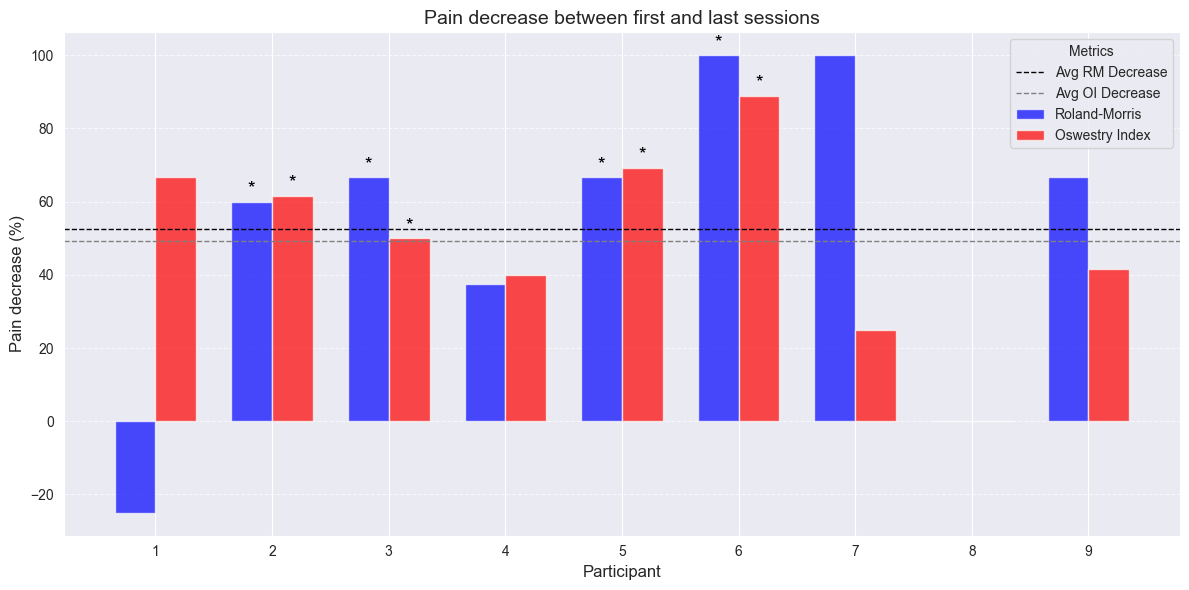

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
participants = df['Numeric ID'].unique()
bar_width = 0.35
x_indices = range(len(participants))
rm_data = df[df['Questionnaire'] == 'Roland-Morris']['Pain Decrease (%)'].values
oi_data = df[df['Questionnaire'] == 'Oswestry Index']['Pain Decrease (%)'].values

# Plot RM and OI as grouped bars and add asterisks for participants who exceed both averages
for idx, participant_id in enumerate(sorted(participants)):
    
    rm_decrease = df[(df['Numeric ID'] == participant_id) & (df['Questionnaire'] == 'Roland-Morris')]['Pain Decrease (%)'].values[0]
    oi_decrease = df[(df['Numeric ID'] == participant_id) & (df['Questionnaire'] == 'Oswestry Index')]['Pain Decrease (%)'].values[0]
    
    ax.bar(idx, rm_decrease, width=bar_width, color='blue', label='Roland-Morris' if idx == 0 else "", alpha=0.7)
    ax.bar(idx + bar_width, oi_decrease, width=bar_width, color='red', label='Oswestry Index' if idx == 0 else "", alpha=0.7)
    
    # Add asterisks for participants who exceed both averages
    if rm_decrease > rm_avg and oi_decrease > oi_avg:
        ax.text(idx, rm_decrease + 2, '*', ha='center', fontsize=14, color='black')
        ax.text(idx + bar_width, oi_decrease + 2, '*', ha='center', fontsize=14, color='black')


ax.axhline(rm_avg, color='black', linestyle='--', linewidth=1, label='Avg RM Decrease')
ax.axhline(oi_avg, color='grey', linestyle='--', linewidth=1, label='Avg OI Decrease')


ax.set_xticks([i + bar_width / 2 for i in x_indices])
ax.set_xticklabels(sorted(participants))
ax.set_title('Pain decrease between first and last sessions', fontsize=14)
ax.set_ylabel('Pain decrease (%)', fontsize=12)
ax.set_xlabel('Participant', fontsize=12)
ax.legend(title='Metrics', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### OI vs RM

C:\Users\Hp\AppData\Local\Temp\ipykernel_16988\1269346552.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Hp\AppData\Local\Temp\ipykernel_16988\1269346552.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


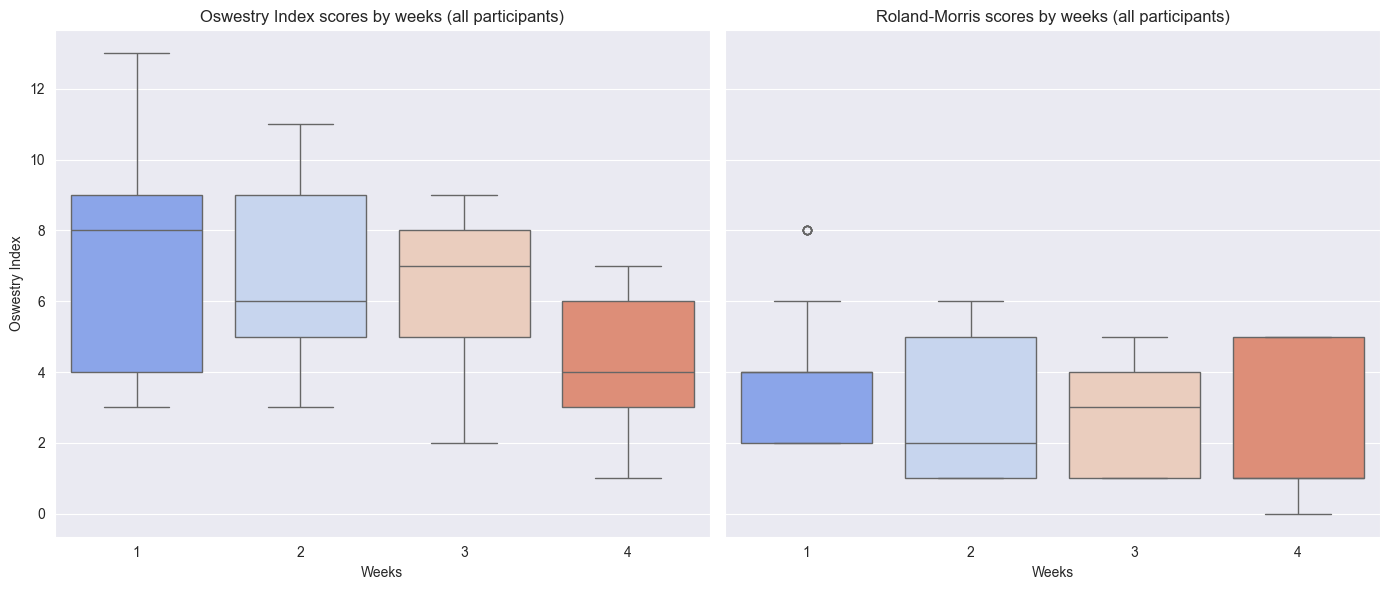

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
# Boxplot for Oswestry Index
sns.boxplot(
    data=df_copy,
    x='session_id',
    y='Oswestry Index',
    ax=axes[0],
    palette="coolwarm"
)
axes[0].set_title("Oswestry Index scores by weeks (all participants)")
axes[0].set_xlabel("Weeks")
axes[0].set_ylabel("Oswestry Index")

# Boxplot for Roland-Morris
sns.boxplot(
    data=df_copy,
    x='session_id',
    y='Roland-Morris',
    ax=axes[1],
    palette="coolwarm"
)
axes[1].set_title("Roland-Morris scores by weeks (all participants)")
axes[1].set_xlabel("Weeks")
axes[1].set_ylabel("Roland-Morris")
plt.tight_layout()
plt.show()